In [1]:
import chess
import numpy as np
import random # built in function
import copy # built in function
import chess.pgn, itertools # built in module
from typing import Iterable
import matplotlib.pyplot as plt # need to add this to python script
import seaborn as sns # need to add this to the python script

In [2]:
# Takes in a fen string and outputs the matrix representing the chess board
# Note: fen to matrix makes a matrix from black's perspective (a8 is 00) if the fen is black's move
# Note: fen to matrix makes a matrix from white's perspective (a1 is 00) if the fen is white's move
def fen_to_matrix(fen):

  #fen = fen.split(' ')[0] # splicing out non-matrix part of fen
  fen = fen.split(' ')
  players_turn = fen[1]
  fen = fen[0]

  board_fen = [fen]
  split_board = board_fen [0].split ('/')
  a1_perspective_board = []
  a8_perspective_board = []

  for row in reversed(split_board) :
    new_row = []
    for value in row:
      if value == '0' or value == '1' or value == '2' or value == '3' or value == '4' or value == '5' or value == '6' or value == '7' or value == '8':
          for i in range(int(value)):
            new_row.append('-')
      else :
          new_row.append (value)
    a1_perspective_board.append(new_row)

  for row in split_board:
    new_row = []
    for value in row:
      if value == '0' or value == '1' or value == '2' or value == '3' or value == '4' or value == '5' or value == '6' or value == '7' or value == '8':
          for i in range(int(value)):
            new_row.append('-')
      else :
          new_row.append (value)
    a8_perspective_board.append(new_row)

  return np.array(a1_perspective_board), np.array(a8_perspective_board), players_turn

## Storage of The Pieces' Positions:

In [3]:
# returns tuple arrays for all the pieces and pawns
def find_positions_array(board, players_turn):
  rook_array = []
  bishops_array = []
  knights_array = []
  queen_array = []
  king_array = []
  pawns_array = []
  opponent_pawns_array = []
  opponent_king_array = []
  opponent_knights_array = []
  opponent_bishops_array = []
  opponent_queen_array = []
  opponent_rooks_array = []

  if players_turn == 'w':
    for i, row in enumerate(board):
      for j, square in enumerate(row):
        if square == 'R':
          rook_array.append((i,j))
        elif square == 'B':
          bishops_array.append((i,j))
        elif square == 'N':
          knights_array.append((i,j))
        elif square == 'Q':
          queen_array.append((i,j))
        elif square == 'K':
          king_array.append((i,j))
        elif square == 'P':
          pawns_array.append((i,j))
        elif square == 'p':
          opponent_pawns_array.append((i,j))
        elif square == 'k':
          opponent_king_array.append((i,j))
        elif square == 'b':
          opponent_bishops_array.append((i,j))
        elif square == 'n':
          opponent_knights_array.append((i,j))
        elif square == 'q':
          opponent_queen_array.append((i,j))
        elif square == 'r':
          opponent_rooks_array.append((i,j))
  else:
    for i, row in enumerate(board):
      for j, square in enumerate(row):
        if square == 'r':
          rook_array.append((i,j))
        elif square == 'b':
          bishops_array.append((i,j))
        elif square == 'n':
          knights_array.append((i,j))
        elif square == 'q':
          queen_array.append((i,j))
        elif square == 'k':
          king_array.append((i,j))
        elif square == 'p':
          pawns_array.append((i,j))
        elif square == 'P':
          opponent_pawns_array.append((i,j))
        elif square == 'K':
          opponent_king_array.append((i,j))
        elif square == 'B':
          opponent_bishops_array.append((i,j))
        elif square == 'N':
          opponent_knights_array.append((i,j))
        elif square == 'Q':
          opponent_queen_array.append((i,j))
        elif square == 'R':
          opponent_rooks_array.append((i,j))

  piece_array = []
  piece_array.append(rook_array)
  piece_array.append(bishops_array)
  piece_array.append(knights_array)
  piece_array.append(queen_array)
  piece_array.append(king_array)
  piece_array.append(pawns_array)
  piece_array.append(opponent_pawns_array)
  piece_array.append(opponent_king_array)
  piece_array.append(opponent_bishops_array)
  piece_array.append(opponent_knights_array)
  piece_array.append(opponent_queen_array)
  piece_array.append(opponent_rooks_array)

  return piece_array


# King:

In [4]:
# returns number of pawns in front of the king
def king_number_friendly_pawn(board, king_array, pawns_array):

  num_friendly_pawns = 0
  king_position = king_array[0]
  for pawn_position in pawns_array:
    if pawn_position[1] == king_position[1]:
      num_friendly_pawns += 1

  return num_friendly_pawns

# no pawn next to the king (f and h pawns)
# At the moment we are returning number of pawns next to king...
def king_number_friendly_pawn_adj(board, king_array, pawns_array):
  num_side_pawns = 0
  king_position = king_array[0]
  for pawn_position in pawns_array:
    if (pawn_position[1]+1) == king_position[1]:
      num_side_pawns += 1
    elif (pawn_position[1]-1) == king_position[1]:
        num_side_pawns += 1

  return num_side_pawns

# check if the kings pawns are advanced by at least one (f,g,h pawns)
def king_friendly_pawn_advanced1(board, king_array, pawns_array):

  num_advanced_pawns = 0
  king_position = king_array[0]
  for pawn_position in pawns_array:
    if ((pawn_position[1]+1) == king_position[1]) and (abs(pawn_position[0]-king_position[0]) > 1):
      num_advanced_pawns += 1
    elif ((pawn_position[1]-1) == king_position[1]) and (abs(pawn_position[0]-king_position[0]) > 1):
        num_advanced_pawns += 1
    elif ((pawn_position[1]) == king_position[1]) and (abs(pawn_position[0]-king_position[0]) > 1):
        num_advanced_pawns += 1

  return num_advanced_pawns

# opponent's g pawn is near our king (should we do same value for every level of closeness? Chose kind of arbitrary closeness...)
def king_number_enemy_pawn(board, king_array, opponent_pawns_array):
  king_position = king_array[0]
  for opponent_pawn in opponent_pawns_array:
    if (opponent_pawn[1] == king_position[1]) and ((opponent_pawn[0]-king_position[0]) < 4) and ((opponent_pawn[0]-king_position[0]) > 0):
      return 1

  return 0

# opponent's f and h pawns are near our king (should we do same value for every level of closeness? Chose kind of arbitrary closeness...)
def king_number_enemy_pawn_adj(board, king_array, opponent_pawns_array):

  num_advanced_enemy_adj_pawns = 0
  king_position = king_array[0]
  for opponent_pawn in opponent_pawns_array:

    if ((opponent_pawn[1]+1) == king_position[1]) and ((opponent_pawn[0]-king_position[0]) < 4) and ((opponent_pawn[0]-king_position[0]) > 0):
      num_advanced_enemy_adj_pawns += 1
    elif ((opponent_pawn[1]-1) == king_position[1]) and ((opponent_pawn[0]-king_position[0]) < 4) and ((opponent_pawn[0]-king_position[0]) > 0):
        num_advanced_enemy_adj_pawns += 1

  return num_advanced_enemy_adj_pawns


# Distance of king from black pieces
# We will use Manhatten Distance in order to calculate this
# Currently we are not weighting according to piece value
def king_pressure_mult(board, king_array, opponent_pawns_array, opponent_bishops_array, opponent_knights_array, opponent_rooks_array, opponent_queen_array):
  king_pressure_score = 0
  king_position = king_array[0]
  if not len(opponent_queen_array) == 0:
    opponent_queen_position = opponent_queen_array[0]
    king_pressure_score += (abs(opponent_queen_position[0]- king_position[0]) + abs(opponent_queen_position[1]- king_position[1]))*9

  for opponent_pawn_position in opponent_pawns_array:
    king_pressure_score += (abs(opponent_pawn_position[0]- king_position[0]) + abs(opponent_pawn_position[1]- king_position[1]))*1

  for opponent_knights_position in opponent_knights_array:
    king_pressure_score += (abs(opponent_knights_position[0]- king_position[0]) + abs(opponent_knights_position[1]- king_position[1]))*3

  for opponent_bishops_position in opponent_bishops_array:
    king_pressure_score += (abs(opponent_bishops_position[0]- king_position[0]) + abs(opponent_bishops_position[1]- king_position[1]))*3

  for opponent_rooks_position in opponent_rooks_array:
    king_pressure_score += (abs(opponent_rooks_position[0]- king_position[0]) + abs(opponent_rooks_position[1]- king_position[1]))*5


  return king_pressure_score*0.1 # we weighted this function

# Pawn:

In [5]:
# counts the number of passed pawns we have on the board and outputs a list of all passed pawns
def passed_pawn_mult(board, pawns_array, opponent_pawns_array):

  num_passed_pawns = 0
  passed_pawns_array = []
  for pawn_position in pawns_array:
    is_passed_pawn = True
    for opponent_pawn_position in opponent_pawns_array:
      if pawn_position[1] == opponent_pawn_position[1]:
        if pawn_position[0] < opponent_pawn_position[0]:
          is_passed_pawn = False
          break
      elif pawn_position[1] - 1  == opponent_pawn_position[1]:
        if pawn_position[0] < opponent_pawn_position[0]:
          is_passed_pawn = False
          break
      elif pawn_position[1] + 1 == opponent_pawn_position[1]:
        if pawn_position[0] < opponent_pawn_position[0]:
          is_passed_pawn = False
          break

    if is_passed_pawn:
      num_passed_pawns += 1
      passed_pawns_array.append(pawn_position)

  return num_passed_pawns, passed_pawns_array

# counts the number of doubled pawns we have on the board
def doubled_pawn_penalty(board, pawns_array):

  num_doubled_pawn_pairs = 0
  for column_number in range(8):
    sum = 0
    for pawn in pawns_array:
      if pawn[1] == column_number:
        sum += 1

    if sum >= 2:
      num_doubled_pawn_pairs += 1

  return num_doubled_pawn_pairs

#counts the number of isolated pawns we have on the board
def isolated_pawn_penalty(board, pawns_array):

  num_isolated_pawns = 0
  isolated_pawns_array = []

  column_indices = [x[1] for x in pawns_array]
  for pawn_position in pawns_array:

    if not (pawn_position[1] - 1) in column_indices:
      if not (pawn_position[1] + 1) in column_indices:
        isolated_pawns_array.append(pawn_position)
        num_isolated_pawns += 1

  return num_isolated_pawns, isolated_pawns_array

# checks for backward pawns (pawns that are no longer defensible by own pawns as they are too advanced. And if pushed will be lost)
def backward_pawn_penalty(board, pawns_array, opponent_pawns_array):

  num_backward_pawns = 0
  backward_pawns_array = []

  for pawn_position in pawns_array:
    can_move_forward = False
    cant_be_defended = False
    can_be_taken = False

    if board[pawn_position[0]+1][pawn_position[1]] == '-':
      can_move_forward = True

    for defending_pawn_position in pawns_array:
      if (defending_pawn_position[1] == pawn_position[1] + 1) or (defending_pawn_position[1] == pawn_position[1] - 1):
        if defending_pawn_position[0] > pawn_position [0]:
          cant_be_defended = True
        else:
          cant_be_defended = False

    for opponent_pawn_position in opponent_pawns_array:
      if (opponent_pawn_position[1] == pawn_position[1] + 1) or (opponent_pawn_position[1] == pawn_position[1] - 1):
        if (opponent_pawn_position[0] == pawn_position[0] + 2):
          can_be_taken = True

    if can_move_forward and cant_be_defended and can_be_taken:
      num_backward_pawns += 1
      backward_pawns_array.append(defending_pawn_position)

  return num_backward_pawns, backward_pawns_array

# metric of how far away the king is from a passed pawn (manhatten distance). Should get argument from total passed pawns.
def passed_pawn_enemy_king_dist(board, passed_pawns_list, enemy_king_array):
  sum_manhatten_distances = 0
  enemy_king_position = enemy_king_array[0]
  for passed_pawn_position in passed_pawns_list:
    sum_manhatten_distances += (abs(passed_pawn_position[0]- enemy_king_position[0]) + abs(passed_pawn_position[1]- enemy_king_position[1]))

  return sum_manhatten_distances

# return number of pawns in the center (including pawn on c4):
def num_center_pawns(board, pawns_array):
  num_center_pawns = 0
  if (3,3) in pawns_array:
    num_center_pawns += 1
  if (3,4) in pawns_array:
    num_center_pawns += 1
  if (4,3) in pawns_array:
    num_center_pawns += 1
  if (4,4) in pawns_array:
    num_center_pawns += 1
  if (3,2) in pawns_array:
    num_center_pawns += 1

  return num_center_pawns

# Bishop


In [6]:
# Total number of moves the bishop can make
def bishop_mobility(board, bishops_array):

  total_num_moves = 0

  for bishop_position in bishops_array:
    bishop_file = bishop_position[1]
    bishop_rank = bishop_position[0]

    current_position = (bishop_rank + 1, bishop_file + 1)
    while (current_position[0] <= 7) and (current_position[1] <= 7):
      if board[current_position[0]][current_position[1]] == '-':
        total_num_moves += 1
        current_position = (current_position[0] + 1, current_position[1] + 1)
      else:
        break

    current_position = (bishop_rank + 1, bishop_file - 1)
    while (current_position[0] <= 7) and (current_position[1] >= 0):
      if board[current_position[0]][current_position[1]] == '-':
        total_num_moves += 1
        current_position = (current_position[0] + 1, current_position[1] - 1)
      else:
        break

    current_position = (bishop_rank - 1, bishop_file + 1)
    while (current_position[0] >= 0) and (current_position[1] <= 7):
      if board[current_position[0]][current_position[1]] == '-':
        total_num_moves += 1
        current_position = (current_position[0] - 1, current_position[1] + 1)
      else:
        break

    current_position = (bishop_rank - 1, bishop_file - 1)
    while (current_position[0] >= 0) and (current_position[1] >= 0):
      if board[current_position[0]][current_position[1]] == '-':
        total_num_moves += 1
        current_position = (current_position[0] - 1, current_position[1] - 1)
      else:
        break

  return total_num_moves

# Checks if we still have two bishops (1 if True 0 if False)
def bishop_pair(bishops_array):
  if len(bishops_array) == 2:
        return 1
  return 0

# Knight

In [7]:
# For the moment, number of possible knight moves
# We should change this to avoid cases where the knight can be taken next move
def knight_sq_mult(board, knights_array, bishops_array, pawns_array, queen_array, king_array, rooks_array):
  total_num_moves = 0

  for knight_position in knights_array:

    possible_moves = [(knight_position[0]+1, knight_position[1]+2),(knight_position[0]+1, knight_position[1]-2),
                      (knight_position[0]-1, knight_position[1]+2), (knight_position[0]-1, knight_position[1]-2),
                      (knight_position[0]+2, knight_position[1]+1), (knight_position[0]-2, knight_position[1]+1),
                       (knight_position[0]+2, knight_position[1]-1), (knight_position[0]-2, knight_position[1]-1)]

    for move in possible_moves:
      if (move[0] < 0 or move[0] > 7) or (move[1] < 0 or move[1] > 7):
        continue
      if (move in bishops_array) or (move in pawns_array) or (move in rooks_array) or (move in king_array) or (move in queen_array) or (move in knights_array):
        continue
      total_num_moves += 1

  return total_num_moves

# Checks for number of outposts.
# Outpost will be defined as a knight in the center or on the opponent's half of the board, defended by an own pawn, and no longer attackable by opponent pawns at all
# never implemented in terms of where on the board it is...
def knight_outpost_mult(board, knights_array, pawns_array, opponent_pawns_array):
  num_knight_outposts = 0

  #check if defended
  #check if can be attacked by enemy pawn
  for knight_position in knights_array:
    defended = False
    unattackable = True


    for pawn_position in pawns_array:
      if (pawn_position[0] == knight_position[0] - 1):
        if (pawn_position[1] == knight_position[1] + 1) or (pawn_position[1] == knight_position[1] - 1):
          defended = True

    for opponent_pawn_position in opponent_pawns_array:
      if (opponent_pawn_position[1] == knight_position[1] + 1) or (opponent_pawn_position[1] == knight_position[1] - 1):
          if opponent_pawn_position[0] > knight_position[0]:
            unattackable = False

    if defended and unattackable:
      num_knight_outposts += 1

  return  num_knight_outposts


# Rook


In [8]:
# check what this is (I think it's if the rook is on the file adjacent to the king)
def rook_attack_king_adj_file(board, rook_array, opponent_king_array):

  num_attacking_king = 0
  opponent_king_position = opponent_king_array[0]
  for rook_position in rook_array:
    if (opponent_king_position[1] == rook_position[1] + 1) or (opponent_king_position[1] == rook_position[1] - 1):
      num_attacking_king += 1

  return num_attacking_king

# checks if the rook is on the same file as the enemy king
def rook_attack_king_file(board, rook_array, opponent_king_array):
  num_attacking_king = 0
  opponent_king_position = opponent_king_array[0]
  for rook_position in rook_array:
    if opponent_king_position[1] == rook_position[1]:
      num_attacking_king += 1

  return num_attacking_king

# checks if the rook is on the 7th rank
def rook_7th_rank(board, rook_array):

  total_rooks = 0
  for rook_position in rook_array:
    if rook_position[0] == 6:
      total_rooks += 1

  return total_rooks

# checks if the rooks defend each other (0 if False, 1 if True)
def rook_connected(board, rook_array):

  if len(rook_array) < 2:
    return 0

  if (rook_array[0][0] == rook_array[1][0]) or (rook_array[0][1] == rook_array[1][1]):
    return 1

  return 0

#total number of squares that the rooks control
def rook_mobility(board, rook_array):
  total_num_moves = 0

  for rook_position in rook_array:
    rook_file = rook_position[1]
    rook_rank = rook_position[0]

    current_position = (rook_rank, rook_file + 1)
    while current_position[1] <= 7:
      if board[current_position[0]][current_position[1]] == '-':
        total_num_moves += 1
        current_position = (rook_rank, current_position[1] + 1)
      else:
        break

    current_position = (rook_rank, rook_file - 1)
    while current_position[1] >= 0:
      if board[current_position[0]][current_position[1]] == '-':
        total_num_moves += 1
        current_position = (rook_rank, current_position[1] - 1)
      else:
        break

    current_position = (rook_rank - 1, rook_file)
    while current_position[0] >= 0:
      if board[current_position[0]][current_position[1]] == '-':
        total_num_moves += 1
        current_position = (current_position[0] - 1, rook_file)
      else:
        break

    current_position = (rook_rank + 1, rook_file)
    while current_position[0] <= 7:
      if board[current_position[0]][current_position[1]] == '-':
        total_num_moves += 1
        current_position = (current_position[0] + 1, rook_file)
      else:
        break

  return total_num_moves

# checks if we have a rook placed behind a passed pawn (also in front of it actually)
def rook_behind_passed_pawn(board, rook_array, passed_pawns_list):
  num_rooks_behind_passed_pawns = 0
  for rook_position in rook_array:
    for passed_pawn_position in passed_pawns_list:
      if rook_position[1] == passed_pawn_position[1]:
         num_rooks_behind_passed_pawns += 1

  return num_rooks_behind_passed_pawns

# check if the rook is on an open file
def rook_open_file(board, rook_array, pawns_array, opponent_pawns_array):

  rooks_on_open_file = 0

  for rook_position in rook_array:
    is_open_file = True
    for pawn_position in pawns_array:
      if rook_position[1] == pawn_position[1]:
        is_open_file = False
    for opponent_pawn_position in opponent_pawns_array:
      if rook_position[1] == opponent_pawn_position[1]:
        is_open_file = False

    if is_open_file:
      rooks_on_open_file += 1

  return rooks_on_open_file

# check if rook is on a semi-open file (can have enemy pawn but not our own pawn)
def rook_semi_open_file(board, rook_array, pawns_array):

  rooks_on_semi_open_file = 0
  semi_open_file_array = []

  for rook_position in rook_array:
    is_semi_open_file = True
    for pawn_position in pawns_array:
      if rook_position[1] == pawn_position[1]:
        is_semi_open_file = False

    if is_semi_open_file:
      rooks_on_semi_open_file += 1
      semi_open_file_array.append(rook_position[1])

  return rooks_on_semi_open_file, semi_open_file_array

# checks if the rook is attacking a weak pawn (backward or isolated) on an open file
def rook_atck_weak_pawn_open_column(board, rook_array, backward_pawns_array, isolated_pawns_array, semi_open_file_array):

  num_rooks_attacking = 0
  for rook_position in rook_array:
    if rook_position[1] not in semi_open_file_array:
      continue
    for backward_pawn in backward_pawns_array:
      if backward_pawn[1] == rook_position[1]:
        num_rooks_attacking += 1
    for isolated_pawn in isolated_pawns_array:
      if isolated_pawn[1] == rook_position[1]:
        num_rooks_attacking += 1

  return num_rooks_attacking

# checks how many open files there are (I think)
def rook_column_mult(board, rook_array):

  num_open_files = 0
  for i, column in enumerate(board.T):
    is_open_file = True
    for j, square in enumerate(column):
      if square == 'p' or square == 'P':
              is_open_file = False
              break
    if is_open_file:
      num_open_files += 1

  return num_open_files

# Queen:

In [9]:
# Total number of moves the Queen can make
def queen_mobility(board, queen_array):

  num_rook_moves = rook_mobility(board, queen_array)
  num_bishop_moves = bishop_mobility(board, queen_array)

  return num_rook_moves + num_bishop_moves

# Miscellanious

In [10]:
# Check if we are checkmating the opponent
def check_checkmate(fen, players_side):
  board = chess.Board(fen)
  _, _, player_to_move = fen_to_matrix(fen)
  if board.is_checkmate() and not (player_to_move == players_side):
    return 100
  return 0

# We don't want to draw if we are ahead in material
def check_if_draw(fen, material_difference):
  board = chess.Board(fen)
  _, _, player_to_move = fen_to_matrix(fen)
  if board.can_claim_draw() and (material_difference >= 0):
    return 100
  return 0

# Piece Tables

In [11]:
# We need to make these tables interpretable by our engine
# We will design functions for them
# This will form the basis of the evaluation function.

def check_knight_table(knights_array):

  knight_value_sum = 0
  knight_table = [[-50,-40,-30,-30,-30,-30,-40,-50],
  [-40,-20,  0,  5,  5,  0,-20,-40],
  [-30,  5, 10, 15, 15, 10,  5,-30],
  [-30,  0, 15, 20, 20, 15,  0,-30],
  [-30,  5, 15, 20, 20, 15,  5,-30],
  [-30,  0, 10, 15, 15, 10,  0,-30],
  [-40,-20,  0,  0,  0,  0,-20,-40],
  [-50,-40,-30,-30,-30,-30,-40,-50]]

  for knight in knights_array:
    knight_value_sum += knight_table[knight[0]][knight[1]]

  return knight_value_sum

def check_bishop_table(bishops_array):

  bishop_value_sum = 0
  bishop_table = [[-20,-10,-10,-10,-10,-10,-10,-20],
  [-10,  5,  0,  0,  0,  0,  5,-10],
  [-10, 10, 10, 10, 10, 10, 10,-10],
  [-10,  0, 10, 10, 10, 10,  0,-10],
  [-10,  5,  5, 10, 10,  5,  5,-10],
  [-10,  0,  5, 10, 10,  5,  0,-10],
  [-10,  0,  0,  0,  0,  0,  0,-10],
  [-20,-10,-10,-10,-10,-10,-10,-20]]

  for bishop in bishops_array:
    bishop_value_sum += bishop_table[bishop[0]][bishop[1]]

  return bishop_value_sum

def check_rook_table(rook_array):

  rook_value_sum = 0
  rook_table = [[0,  0,  0,  5,  5,  0,  0,  0],
    [-5,  0,  0,  0,  0,  0,  0, -5],
    [-5,  0,  0,  0,  0,  0,  0, -5],
    [-5,  0,  0,  0,  0,  0,  0, -5],
    [-5,  0,  0,  0,  0,  0,  0, -5],
    [-5,  0,  0,  0,  0,  0,  0, -5],
    [5, 10, 10, 10, 10, 10, 10,  5],
    [0,  0,  0,  0,  0,  0,  0,  0]]


  for rook in rook_array:
    rook_value_sum += rook_table[rook[0]][rook[1]]

  return rook_value_sum

def check_queen_table(queen_array):

  queen_value_sum = 0
  queen_table = [[-20,-10,-10, -5, -5,-10,-10,-20],
  [-10,  0,  5,  0,  0,  0,  0,-10],
  [-10,  5,  5,  5,  5,  5,  0,-10],
  [0,  0,  5,  5,  5,  5,  0, -5],
  [-5,  0,  5,  5,  5,  5,  0, -5],
  [-10,  0,  5,  5,  5,  5,  0,-10],
  [-10,  0,  0,  0,  0,  0,  0,-10],
  [-20,-10,-10, -5, -5,-10,-10,-20]]

  for queen in queen_array:
    queen_value_sum += queen_table[queen[0]][queen[1]]

  return queen_value_sum

# middlegame is determined by opponent material sum
def check_king_table(king_array, is_middlegame=True):

  king_value_sum = 0
  king_middlegame_table = [[20, 30, 10,  0,  -20, 10, 30, 20],
  [20, 20,  -20,  -20,  -20,  -20, 20, 20],
  [-10,-20,-20,-20,-20,-20,-20,-10],
  [-20,-30,-30,-40,-40,-30,-30,-20],
  [-30,-40,-40,-50,-50,-40,-40,-30],
  [-30,-40,-40,-50,-50,-40,-40,-30],
  [-30,-40,-40,-50,-50,-40,-40,-30],
  [-30,-40,-40,-50,-50,-40,-40,-30]]

  king_endgame_table = [[-50,-30,-30,-30,-30,-30,-30,-50],
  [-30,-30,  0,  0,  0,  0,-30,-30],
  [-30,-10, 20, 30, 30, 20,-10,-30],
  [-30,-10, 30, 40, 40, 30,-10,-30],
  [-30,-10, 30, 40, 40, 30,-10,-30],
  [-30,-10, 20, 30, 30, 20,-10,-30],
  [-30,-20,-10,  0,  0,-10,-20,-30],
  [-50,-40,-30,-20,-20,-30,-40,-50]]

  if is_middlegame:
    king_value_sum += king_middlegame_table[king_array[0][0]][king_array[0][1]]
  else:
    king_value_sum += king_endgame_table[king_array[0][0]][king_array[0][1]]

  return king_value_sum

def check_pawn_table(pawns_array):

  pawn_value_sum = 0
  pawn_table = [[0,  0,  0,  0,  0,  0,  0,  0],
  [5, 10, 10,-20,-20, 10, 10,  5],
  [5, -5,-10,  0,  0,-10, -5,  5],
  [0,  0,  0, 20, 20,  0,  0,  0],
  [5,  5, 10, 25, 25, 10,  5,  5],
  [10, 10, 20, 30, 30, 20, 10, 10],
  [50, 50, 50, 50, 50, 50, 50, 50],
  [0,  0,  0,  0,  0,  0,  0,  0]]

  for pawn in pawns_array:
    pawn_value_sum += pawn_table[pawn[0]][pawn[1]]

  return pawn_value_sum



# Parameters of Organism



In [12]:
# Values of each piece
class Piece_Value_Parameters:
  PAWN_VALUE = 0
  KNIGHT_VALUE = 0
  BISHOP_VALUE = 0
  ROOK_VALUE = 0
  QUEEN_VALUE = 0

# Pawn Properties
class Pawn_Parameters:
  PASSED_PAWN_MULT = 0
  DOUBLED_PAWN_PENALTY = 0
  ISOLATED_PAWN_PENALTY = 0
  BACKWARD_PAWN_PENALTY = 0
  PASSED_PAWN_ENEMY_KING_DIST = 0
  NUM_CENTER_PAWNS = 0

# Knight Properties
class Knight_Parameters:
  KNIGHT_SQ_MULT = 0
  KNIGHT_OUTPOST_MULT = 0

# Bishop Properties
class Bishop_Parameters:
  BISHOP_MOBILITY = 0
  BISHOP_PAIR = 0

# Rook Properties
class Rook_Parameters:
  ROOK_ATTACK_KING_FILE = 0
  ROOK_ATTACK_KING_ADJ_FILE = 0
  ROOK_7TH_RANK = 0
  ROOK_CONNECTED = 0
  ROOK_MOBILITY = 0
  ROOK_BEHIND_PASSED_PAWN = 0
  ROOK_OPEN_FILE = 0
  ROOK_SEMI_OPEN_FILE = 0
  ROOK_ATCK_WEAK_PAWN_OPEN_COLUMN = 0
  ROOK_COLUMN_MULT = 0

# Queen Properties
class Queen_Parameters:
  QUEEN_MOBILITY = 0

# King Properties
class King_Parameters:
  KING_NUMBER_FRIENDLY_PAWN = 0
  KING_NUMBER_FRIENDLY_PAWN_ADJ = 0
  KING_FRIENDLY_PAWN_ADVANCED1 = 0
  KING_NUMBER_ENEMY_PAWN = 0
  KING_NUMBER_ENEMY_PAWN_ADJ = 0
  KING_PRESSURE_MULT = 0

class Miscellanious_Parameters:
  CHECKMATE = 0
  DRAW = 0

class Piece_Table_Parameters:
  PAWN_PIECE_TABLE = 0
  KNIGHT_PIECE_TABLE = 0
  BISHOP_PIECE_TABLE = 0
  ROOK_PIECE_TABLE = 0
  QUEEN_PIECE_TABLE = 0
  KING_PIECE_TABLE = 0

class Parameters:
  def __init__(self, Piece_Value_Parameters, Pawn_Parameters, Knight_Parameters, Bishop_Parameters, Rook_Parameters, Queen_Parameters, King_Parameters, Miscellanious_Parameters, Piece_Table_Parameters):

    self.Piece_Value_Parameters = Piece_Value_Parameters
    self.Pawn_Parameters = Pawn_Parameters
    self.Knight_Parameters = Knight_Parameters
    self.Bishop_Parameters = Bishop_Parameters
    self.Rook_Parameters = Rook_Parameters
    self.Queen_Parameters = Queen_Parameters
    self.King_Parameters = King_Parameters
    self.Miscellanious_Parameters = Miscellanious_Parameters
    self.Piece_Table_Parameters = Piece_Table_Parameters

# Final Evaluation Function:

In [13]:
# Add for good things
# Subtract for bad things

# Got rid of 7th rank and num open file
def evaluate_one_side(fen, board, Parameters, piece_array, players_turn):
  score = 0

  rook_array = piece_array[0]
  bishops_array = piece_array[1]
  knights_array = piece_array[2]
  queen_array = piece_array[3]
  king_array = piece_array[4]
  pawns_array = piece_array[5]
  opponent_pawns_array= piece_array[6]
  opponent_king_array= piece_array[7]
  opponent_bishops_array = piece_array[8]
  opponent_knights_array = piece_array[9]
  opponent_queen_array = piece_array[10]
  opponent_rooks_array = piece_array[11]

  # Material Evaluation
  our_material_value = len(rook_array)*5+len(bishops_array)*3+len(knights_array)*3+len(queen_array)*9+len(pawns_array)
  opponent_material_value = len(opponent_rooks_array)*5+len(opponent_bishops_array)*3+len(opponent_knights_array)*3+len(opponent_queen_array)*9+len(opponent_pawns_array)
  material_difference = our_material_value - opponent_material_value
  is_middlegame = True
  if opponent_material_value < 10:
    is_middlegame = False

  # Piece Evaluation
  score += Parameters.Piece_Value_Parameters.KNIGHT_VALUE * len(knights_array)
  score += Parameters.Piece_Value_Parameters.ROOK_VALUE * len(rook_array)
  score += Parameters.Piece_Value_Parameters.BISHOP_VALUE * len(bishops_array)
  score += Parameters.Piece_Value_Parameters.PAWN_VALUE * len(pawns_array)
  score += Parameters.Piece_Value_Parameters.QUEEN_VALUE * len(queen_array)

  # Pawn Evaluation:
  passed_pawn_result, passed_pawns_list = passed_pawn_mult(board, pawns_array, opponent_pawns_array)
  score += passed_pawn_result*Parameters.Pawn_Parameters.PASSED_PAWN_MULT
  score -= doubled_pawn_penalty(board, pawns_array)*Parameters.Pawn_Parameters.DOUBLED_PAWN_PENALTY
  isolated_pawn_result, isolated_pawns_array = isolated_pawn_penalty(board, pawns_array)
  bp_pawn_result, backward_pawns_array = backward_pawn_penalty(board, pawns_array, opponent_pawns_array)
  score -= isolated_pawn_result*Parameters.Pawn_Parameters.ISOLATED_PAWN_PENALTY
  score -= bp_pawn_result*Parameters.Pawn_Parameters.BACKWARD_PAWN_PENALTY
  score += passed_pawn_enemy_king_dist(board, passed_pawns_list, opponent_king_array)*Parameters.Pawn_Parameters.PASSED_PAWN_ENEMY_KING_DIST # need to be careful about this one's weighting maybe
  score += num_center_pawns(board, pawns_array)*Parameters.Pawn_Parameters.NUM_CENTER_PAWNS

  # Rook Evaluation:
  score  += rook_attack_king_adj_file(board, rook_array, opponent_king_array)*Parameters.Rook_Parameters.ROOK_ATTACK_KING_ADJ_FILE
  score  += rook_attack_king_file(board, rook_array, opponent_king_array)*Parameters.Rook_Parameters.ROOK_ATTACK_KING_FILE
  score  += rook_connected(board, rook_array)*Parameters.Rook_Parameters.ROOK_CONNECTED
  score  += rook_mobility(board, rook_array)*Parameters.Rook_Parameters.ROOK_MOBILITY
  score  += rook_behind_passed_pawn(board, rook_array, passed_pawns_list)*Rook_Parameters.ROOK_BEHIND_PASSED_PAWN
  score  += rook_open_file(board, rook_array, pawns_array, opponent_pawns_array)*Parameters.Rook_Parameters.ROOK_OPEN_FILE
  semi_open_file_result, semi_open_file_array =  rook_semi_open_file(board, rook_array, pawns_array)
  score  +=  semi_open_file_result*Parameters.Rook_Parameters.ROOK_SEMI_OPEN_FILE
  score  += rook_atck_weak_pawn_open_column(board, rook_array, backward_pawns_array, isolated_pawns_array, semi_open_file_array)*Rook_Parameters.ROOK_ATCK_WEAK_PAWN_OPEN_COLUMN

  # King Evaluation:
  score -= king_pressure_mult(board, king_array, opponent_pawns_array, opponent_bishops_array, opponent_knights_array, opponent_rooks_array, opponent_queen_array)*Parameters.King_Parameters.KING_PRESSURE_MULT
  score -= king_number_enemy_pawn_adj(board, king_array, opponent_pawns_array)*Parameters.King_Parameters.KING_NUMBER_ENEMY_PAWN_ADJ
  score -= king_number_enemy_pawn(board, king_array, opponent_pawns_array)*Parameters.King_Parameters.KING_NUMBER_ENEMY_PAWN
  score -= king_friendly_pawn_advanced1(board, king_array, pawns_array)*Parameters.King_Parameters.KING_FRIENDLY_PAWN_ADVANCED1
  score += king_number_friendly_pawn_adj(board, king_array, pawns_array)*Parameters.King_Parameters.KING_NUMBER_FRIENDLY_PAWN_ADJ
  score += king_number_friendly_pawn(board, king_array, pawns_array)*Parameters.King_Parameters.KING_NUMBER_FRIENDLY_PAWN

  # Queen Evaluation:
  score += queen_mobility(board, queen_array)*Parameters.Queen_Parameters.QUEEN_MOBILITY

  # Knight Evaluation:
  score += knight_sq_mult(board, knights_array, bishops_array, pawns_array, queen_array, king_array, rook_array)*Parameters.Knight_Parameters.KNIGHT_SQ_MULT
  score += knight_outpost_mult(board, knights_array, pawns_array, opponent_pawns_array)*Parameters.Knight_Parameters.KNIGHT_OUTPOST_MULT

  # Bishop Evaluation:
  score += bishop_pair(bishops_array)*Parameters.Bishop_Parameters.BISHOP_PAIR
  score += bishop_mobility(board, bishops_array)*Parameters.Bishop_Parameters.BISHOP_MOBILITY

  # Miscellanious Evalutation:
  score += check_checkmate(fen, players_turn)*Parameters.Miscellanious_Parameters.CHECKMATE
  #score -= check_if_draw(fen, material_difference)*Parameters.Miscellanious_Parameters.DRAW

  # Piece Table Evaluation
  score += check_knight_table(knights_array)*Parameters.Piece_Table_Parameters.KNIGHT_PIECE_TABLE
  score += check_bishop_table(bishops_array)*Parameters.Piece_Table_Parameters.BISHOP_PIECE_TABLE
  score += check_rook_table(rook_array)*Parameters.Piece_Table_Parameters.ROOK_PIECE_TABLE
  score += check_queen_table(queen_array)*Parameters.Piece_Table_Parameters.QUEEN_PIECE_TABLE
  score += check_king_table(king_array, is_middlegame)*Parameters.Piece_Table_Parameters.KING_PIECE_TABLE
  score += check_pawn_table(pawns_array)*Parameters.Piece_Table_Parameters.PAWN_PIECE_TABLE

  return score

In [14]:
# There is some weird minimax stuff goin on here.
def evaluate(fen, Parameters, maximizing_player=True):

  # Note: fen to matrix makes a matrix from black's perspective (a8 is 00) if the fen is black's move
  # Note: fen to matrix makes a matrix from white's perspective (a1 is 00) if the fen is white's move

  a1_matrix, a8_matrix, opponents_turn = fen_to_matrix(fen)

  players_turn = 'w'
  if opponents_turn == 'w':
    players_turn = 'b'

  if players_turn == 'w':
    players_matrix = a1_matrix
    opponents_matrix = a8_matrix
  else:
    players_matrix = a8_matrix
    opponents_matrix = a1_matrix

  piece_array = find_positions_array(players_matrix, players_turn)
  our_score = evaluate_one_side(fen, players_matrix, Parameters, piece_array, players_turn)
  #print("Our Score: ", our_score)

  opponents_piece_array = find_positions_array(opponents_matrix, opponents_turn)
  opponents_score = evaluate_one_side(fen, opponents_matrix, Parameters, opponents_piece_array, opponents_turn)
  #print("Opponent's score: ", opponents_score)
  if(not maximizing_player):
    return (opponents_score - our_score)
  return (our_score - opponents_score)

# Predictor Function:


In [15]:
# Gets best move out of all possible moves using evaluation function
def predict(fen, Parameters):

  board = chess.Board(fen)
  legal_moves = list(board.legal_moves)
  current_best_move = list(board.legal_moves)[0]
  current_best_evaluation = -np.inf
  new_board = board

  for move in legal_moves:
    new_board = copy.deepcopy(board) # need to make a deep copy? Maybe can just be copy?
    new_board.push(move)
    move_evaluation = evaluate(new_board.fen(), Parameters)

    if move_evaluation > current_best_evaluation:
      current_best_evaluation = move_evaluation
      current_best_move = move

  return current_best_move

# GA Algorithm Parameters:

In [16]:
population_size = 2 # should be 100
crossover_rate = 0.75
mutation_rate = 0.005
number_of_generations = 2 # should be 200
elitism_rate = 0.1
bit_string_size = 244
num_positions = 1000 # should be 5000

# Binary encoding of Chromosome:

In [17]:
# converts the gray code string into decimals
def gray_to_decimal(gray_code):
    binary = gray_code[0]
    for i in range(1, len(gray_code)):
        if gray_code[i] == '1':
            if binary[-1] == '0':
                binary += '1'
            else:
                binary += '0'
        else:
            binary += binary[-1]
    return int(binary, 2)


# Converts gray code bit string into decimal parameters
# First 44 elements of bit string are piece values, rest are 6 bit of other parameters
def bit_to_params(bit_string):

  # done
  piece_values = Piece_Value_Parameters()
  piece_values.PAWN_VALUE = 100
  piece_values.KNIGHT_VALUE = gray_to_decimal(bit_string[0:11])
  piece_values.BISHOP_VALUE = gray_to_decimal(bit_string[11:22])
  piece_values.ROOK_VALUE = gray_to_decimal(bit_string[22:33])
  piece_values.QUEEN_VALUE = gray_to_decimal(bit_string[33:44])

  # done
  bishop_parameters = Bishop_Parameters()
  bishop_parameters.BISHOP_MOBILITY = gray_to_decimal(bit_string[44:50])
  bishop_parameters.BISHOP_PAIR = gray_to_decimal(bit_string[50:56])

  # done
  knight_parameters = Knight_Parameters()
  knight_parameters.KNIGHT_SQ_MULT = gray_to_decimal(bit_string[56:62])
  knight_parameters.KNIGHT_OUTPOST_MULT = gray_to_decimal(bit_string[62:68])

  # done
  queen_parameters = Queen_Parameters()
  queen_parameters.QUEEN_MOBILITY = gray_to_decimal(bit_string[68:74])

  # done
  king_parameters = King_Parameters()
  king_parameters.KING_NUMBER_FRIENDLY_PAWN = gray_to_decimal(bit_string[74:80])
  king_parameters.KING_NUMBER_FRIENDLY_PAWN_ADJ = gray_to_decimal(bit_string[80:86])
  king_parameters.KING_FRIENDLY_PAWN_ADVANCED1 = gray_to_decimal(bit_string[86:92])
  king_parameters.KING_NUMBER_ENEMY_PAWN = gray_to_decimal(bit_string[92:98])
  king_parameters.KING_NUMBER_ENEMY_PAWN_ADJ = gray_to_decimal(bit_string[98:104])
  king_parameters.KING_PRESSURE_MULT = gray_to_decimal(bit_string[104:110])

  # done
  pawn_parameters = Pawn_Parameters()
  pawn_parameters.PASSED_PAWN_MULT = gray_to_decimal(bit_string[110:116])
  pawn_parameters.DOUBLED_PAWN_PENALTY = gray_to_decimal(bit_string[116:122])
  pawn_parameters.ISOLATED_PAWN_PENALTY = gray_to_decimal(bit_string[122:128])
  pawn_parameters.BACKWARD_PAWN_PENALTY = gray_to_decimal(bit_string[128:134])
  pawn_parameters.PASSED_PAWN_ENEMY_KING_DIST = gray_to_decimal(bit_string[134:140])
  pawn_parameters.NUM_CENTER_PAWNS = gray_to_decimal(bit_string[140:146])

  # done
  rook_parameters = Rook_Parameters()
  rook_parameters.ROOK_ATTACK_KING_FILE = gray_to_decimal(bit_string[146:152])
  rook_parameters.ROOK_ATTACK_KING_ADJ_FILE = gray_to_decimal(bit_string[152:158])
  rook_parameters.ROOK_CONNECTED = gray_to_decimal(bit_string[158:164])
  rook_parameters.ROOK_MOBILITY = gray_to_decimal(bit_string[164:170])
  rook_parameters.ROOK_OPEN_FILE = gray_to_decimal(bit_string[170:176])
  rook_parameters.ROOK_SEMI_OPEN_FILE = gray_to_decimal(bit_string[176:182])
  rook_parameters.ROOK_ATCK_WEAK_PAWN_OPEN_COLUMN = gray_to_decimal(bit_string[182:188])
  rook_parameters.ROOK_BEHIND_PASSED_PAWN = gray_to_decimal(bit_string[188:194])

  # done
  piece_table_parameters = Piece_Table_Parameters()
  piece_table_parameters.PAWN_PIECE_TABLE = gray_to_decimal(bit_string[194:200])
  piece_table_parameters.KNIGHT_PIECE_TABLE = gray_to_decimal(bit_string[200:206])
  piece_table_parameters.BISHOP_PIECE_TABLE = gray_to_decimal(bit_string[206:212])
  piece_table_parameters.ROOK_PIECE_TABLE = gray_to_decimal(bit_string[212:218])
  piece_table_parameters.QUEEN_PIECE_TABLE = gray_to_decimal(bit_string[218:224])
  piece_table_parameters.KING_PIECE_TABLE = gray_to_decimal(bit_string[224:230])

  # done
  miscellanious_parameters = Miscellanious_Parameters()
  miscellanious_parameters.CHECKMATE = gray_to_decimal(bit_string[230:244]) # We will give checkmate 14 bits

  parameters = Parameters(piece_values, pawn_parameters, knight_parameters, bishop_parameters, rook_parameters, queen_parameters, king_parameters, miscellanious_parameters, piece_table_parameters)

  return parameters

# Converts gray code bit string into bit parameters
def bit_to_bit_param_array(bit_string):

  bit_array = []

  bit_array.append(bit_string[0:11])
  bit_array.append(bit_string[11:22])
  bit_array.append(bit_string[22:33])
  bit_array.append(bit_string[33:44])
  bit_array.append(bit_string[44:50])
  bit_array.append(bit_string[50:56])
  bit_array.append(bit_string[56:62])
  bit_array.append(bit_string[62:68])
  bit_array.append(bit_string[68:74])
  bit_array.append(bit_string[74:80])
  bit_array.append(bit_string[80:86])
  bit_array.append(bit_string[86:92])
  bit_array.append(bit_string[92:98])
  bit_array.append(bit_string[98:104])
  bit_array.append(bit_string[104:110])
  bit_array.append(bit_string[110:116])
  bit_array.append(bit_string[116:122])
  bit_array.append(bit_string[122:128])
  bit_array.append(bit_string[128:134])
  bit_array.append(bit_string[134:140])
  bit_array.append(bit_string[140:146])
  bit_array.append(bit_string[146:152])
  bit_array.append(bit_string[152:158])
  bit_array.append(bit_string[158:164])
  bit_array.append(bit_string[164:170])
  bit_array.append(bit_string[170:176])
  bit_array.append(bit_string[176:182])
  bit_array.append(bit_string[182:188])
  bit_array.append(bit_string[188:194])
  bit_array.append(bit_string[194:200])
  bit_array.append(bit_string[200:206])
  bit_array.append(bit_string[206:212])
  bit_array.append(bit_string[212:218])
  bit_array.append(bit_string[218:224])
  bit_array.append(bit_string[224:230])
  bit_array.append(bit_string[230:244])

  return bit_array




# Selection, Mutation and Crossover:

In [18]:
# Fitness Proportional Selection (using roulette wheel selection)
def parent_selection(current_population, fitness_array):

    total_fitness = sum(fitness_array)
    if total_fitness == 0:
      selection_probabilities = [1/len(fitness_array) for fitness in fitness_array]
    else:
      selection_probabilities = [fitness / total_fitness for fitness in fitness_array]

    # Generate a cumulative probability distribution
    cumulative_probabilities = [sum(selection_probabilities[:i + 1]) for i in range(len(selection_probabilities))]

    # Perform the selection
    r = random.random()  # Generate a random number between 0 and 1
    selected_index = 0
    for i, cumulative_probability in enumerate(cumulative_probabilities):
        if r <= cumulative_probability:
            selected_index = i
            break

    return current_population[selected_index]

# Uniform Crossover (checked and works)
def uniform_crossover(parent1, parent2):
    
  if len(parent1) != len(parent2):
      raise ValueError("Parents must have the same length.")

  child = []
  for gene1, gene2 in zip(parent1, parent2):
      if random.random() < 0.5:
          child.append(gene1)
      else:
          child.append(gene2)

  final_child = ''
  for gene in child:
    final_child = final_child + gene
    
  return final_child

# Mutation (checked and works)
def bit_flip_mutation(bit_string, mutation_rate):
  mutated_bit_string = ''

  for bit in bit_string:
      if random.random() < mutation_rate:
          # Flip the bit
          mutated_bit = '0' if bit == '1' else '1'
      else:
          mutated_bit = bit

      mutated_bit_string = mutated_bit_string + mutated_bit

  return mutated_bit_string

# Makes a new population given an array of organisms with different fitnesses
def create_new_population(current_population, fitness_array):
    new_population = []

    # Combine the current population with their fitness values
    population_with_fitness = list(zip(current_population, fitness_array))

    # Sort the population based on fitness in descending order
    sorted_population = sorted(population_with_fitness, key=lambda x: x[1], reverse=True)

    # Determine the number of elite individuals based on the elitism rate
    num_elite = int(len(current_population) * elitism_rate)

    # Add the elite individuals to the new population
    elites = [individual[0] for individual in sorted_population[:num_elite]]
    new_population.extend(elites)

    # Perform crossover and selection for the remaining individuals
    for _ in range(len(current_population) - num_elite):
        parent1 = parent_selection(current_population, fitness_array)
        parent2 = parent_selection(current_population, fitness_array)

        # here we need to turn the parents into arrays of the genes
        parent1_array = bit_to_bit_param_array(parent1)
        parent2_array = bit_to_bit_param_array(parent2)

        if random.random() < crossover_rate:
            child = uniform_crossover(parent1_array, parent2_array)
        else:
            child = random.choice([parent1, parent2])

        mutated_child = bit_flip_mutation(child, mutation_rate)

        new_population.append(mutated_child)

    return new_population

# Getting The Data for the Evolutionary Process:

In [19]:
def iterate_games(pgn_path:str,
                  file_offsets:Iterable[int]|None=None,

                  file_info:bool=True,
                  headers_only:bool=False,
                  show_progress:bool=False,

                  ) -> Iterable[chess.pgn.Game] | Iterable[chess.pgn.Headers]:
    '''
    Generate an iterator over the games in a pgn file.

    Args:
        pgnPath      (str)               : Path to the pgn file \n
        file_offsets (Iterable[int]|None): if provided will be used as a collection of offsets into the file representing the starts of the games you with to consider \n

        file_info    (bool): if True will add `FileOffset` and `FilePath` to the headers \n
        headers_only (bool): if True will only yield header dictionaries. This skips game-parsing. \n
        show_progress(bool): Display ipywidgets.FloatProgress \n

    Return:
        a lazily evaluated iterable over games xor headers of all games in the pgn database
    '''

    if show_progress:
        show_progress = False
        args = {**locals()}
        bar = ipywidgets.FloatProgress(max=1)
        display(bar)
        for bar.value, game in enumerate(iterate_games(**args)):
            if bar.max <= bar.value: # type: ignore
                bar.max = bar.value * max(10, np.exp(-bar.value / 1000 + 4))
            yield game
        else:
            clear_output()
        return

    with open(pgn_path, 'r') as file:
        parse_function = chess.pgn.read_headers if headers_only else chess.pgn.read_game
        for file_offset in file_offsets or itertools.repeat(None):

            if file_offset is not None:
                file.seek(file_offset)

            file_offset = file.tell()
            parsed:chess.pgn.Headers|chess.pgn.Game|None = parse_function(file)

            if parsed is None:
                break

            headers:chess.pgn.Headers = parsed if headers_only else parsed.headers # type: ignore
            if file_info:
                headers['FileOffset'] = f'{file_offset}'
                headers['FilePath'] = pgn_path

            yield parsed

In [20]:
EXAMPLE_PGN_PATH = 'lichess_elite_2022-12.pgn'

In [21]:
# Header only query test
file_offsets=list(itertools.islice((
    int(game_headers.get('FileOffset'))
    for game_headers in iterate_games(EXAMPLE_PGN_PATH, headers_only=True)
    if '1-0' in game_headers.get('Result')
    and int(game_headers.get('WhiteElo')) >= 2500
    and int(game_headers.get('BlackElo')) >= 2500
),  num_positions))

# List of pgn games
games_list = list(iterate_games(EXAMPLE_PGN_PATH, file_offsets=file_offsets))
print(len(games_list))

1000


In [22]:
# Needs to be of perspective of side to move
def get_random_position(game, perspective='white'):

    # Convert the moves to a list
    moves = list(game.mainline_moves())

    # Generate a random position from the game
    board = chess.Board()

    # Select a random move and play it on the board
    # need to get an even number for a white position and an odd number for a black position
    #print(len(moves))
    if len(moves) < 2:
      random_index = 0
    else:
      random_index = random.randint(0, (len(moves) - 2) // 2)  # Exclude final position
      if perspective == 'white':
        random_index = random_index*2
      elif perspective == 'black':
        random_index = random_index*2 + 1

    random_move = moves[random_index]
    for i, move in enumerate(moves):
        if i == random_index:
            break
        board.push(move)

    # Return the FEN representation and the move of the position
    return board.fen(), board.san(random_move)

In [23]:
position_move_array = []
for game in games_list:
  random_position, random_move = get_random_position(game)
  position_move_array.append((random_position, random_move))

#print(position_move_array)

# Functions necessary for evolution:

In [24]:
# Makes a random binary string of length n (our Chromosome)
def generate_random_binary_string(n):
    binary_string = ""
    for _ in range(n):
        bit = random.randint(0, 1)
        binary_string += str(bit)
    return binary_string

In [25]:
#Predict function is very time consuming and there are many positions in position_move_array
def calculate_fitness(current_population):
  current_fitness_array = []

  for i, bit_string in enumerate(current_population): # We want to run these in parallel, not sequentially
    parameters = bit_to_params(bit_string)
    fitness = 0

    for element in position_move_array: # We want to run these in parallel, not sequentially
      position = element[0]
      position_move = element[1]

      myBoardActual = chess.Board(position)

      myBoardActual.push_san(position_move)

      actual_move_uci = myBoardActual.move_stack[-1].uci()

      predicted_move = predict(position, parameters).uci()

      if actual_move_uci == predicted_move:
        fitness += 1
        
    print("Organism number ", i)
    current_fitness_array.append(fitness)
    #print(100*fitness/len(position_move_array))

  print("Fittest Organism: ", max(current_fitness_array))
  print("Fitness Array: ", current_fitness_array)
  current_fitness_array = np.array(current_fitness_array)**2

  return current_fitness_array

# Evolution:

In [26]:
# Generate the initial population:
current_population = []
for i in range(population_size): # population size is 100
  current_population.append(generate_random_binary_string(bit_string_size))

for generation_number in range(number_of_generations): # 200 generations

  # Get the fitness of the current generation
  print("Generation", generation_number, ":")
  organism_length_array = []
  for organism in current_population:
    organism_length_array.append(len(organism))
  fitness_array = calculate_fitness(current_population)

  # Do Mutation, Crossover, Elitism and all that nice stuff to the current_population
  current_population = create_new_population(current_population, fitness_array)
  
print("Optimal_Organism: ", current_population[np.argmax(fitness_array)])

Generation 0 :
Organism number  0
Organism number  1
Fittest Organism:  167
Fitness Array:  [165, 167]
Generation 1 :
Organism number  0
Organism number  1
Fittest Organism:  167
Fitness Array:  [167, 167]
Optimal_Organism:  0010110010101011000000110111010001111100000010011100110111110001001111111110100100011110011000110110101100001011100001101101100100110001011101101100001100101011011110100011001110100110001100001101010001100010100001000111011111010111000110111001


Pawn Value:  100
Knight Value:  1339
Bishop Value:  1834
Rook Value:  2004
Queen Value:  1968
Bishop Mobility:  33
Bishop Pair:  13
Knight Mobility:  13
Knight Outposts:  9
Queen Mobility:  11
King Number Friendly Pawn: 45
King Number Friendly Pawn Adjacent: 2
KING_FRIENDLY_PAWN_ADVANCED1:  30
KING_NUMBER_ENEMY_PAWN:  3
KING_NUMBER_ENEMY_PAWN_ADJ:  2
KING_PRESSURE_MULT:  38
PASSED_PAWN_MULT:  12
DOUBLED_PAWN_PENALTY:  53
ISOLATED_PAWN_PENALTY:  36
BACKWARD_PAWN_PENALTY:  8
PASSED_PAWN_ENEMY_KING_DIST:  5
NUM_CENTER_PAWNS:  51
ROOK_ATTACK_KING_FILE:  57
ROOK_ATTACK_KING_ADJ_FILE:  24
ROOK_CONNECTED:  19
ROOK_MOBILITY:  34
ROOK_OPEN_FILE:  8
ROOK_SEMI_OPEN_FILE:  35
ROOK_ATCK_WEAK_PAWN_OPEN_COLUMN:  62
ROOK_BEHIND_PASSED_PAWN:  23
PAWN_PIECE_TABLE:  41
KNIGHT_PIECE_TABLE:  26
BISHOP_PIECE_TABLE:  12
ROOK_PIECE_TABLE:  4
QUEEN_PIECE_TABLE:  4
KING_PIECE_TABLE:  42
CHECKMATE:  15662


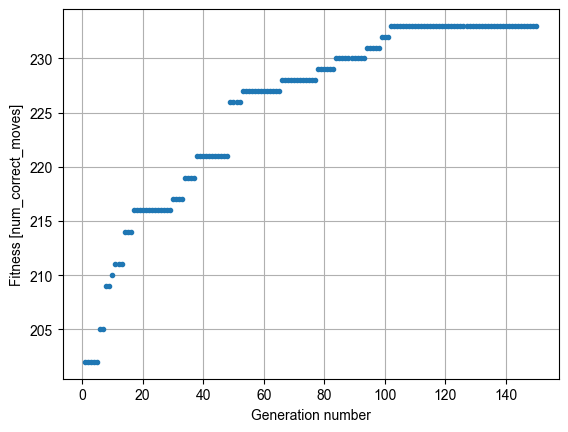

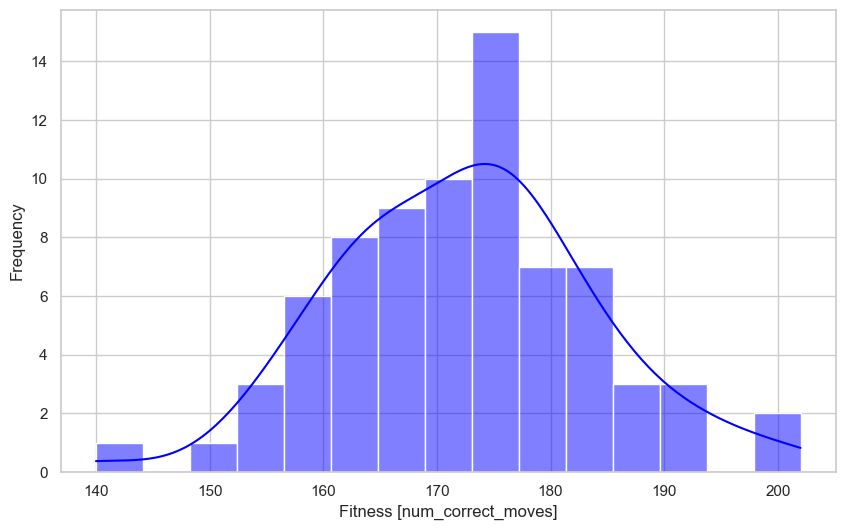

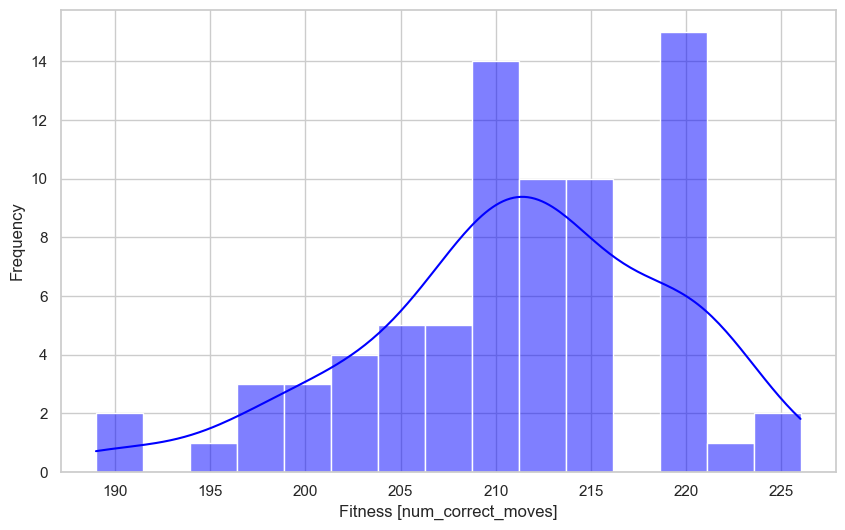

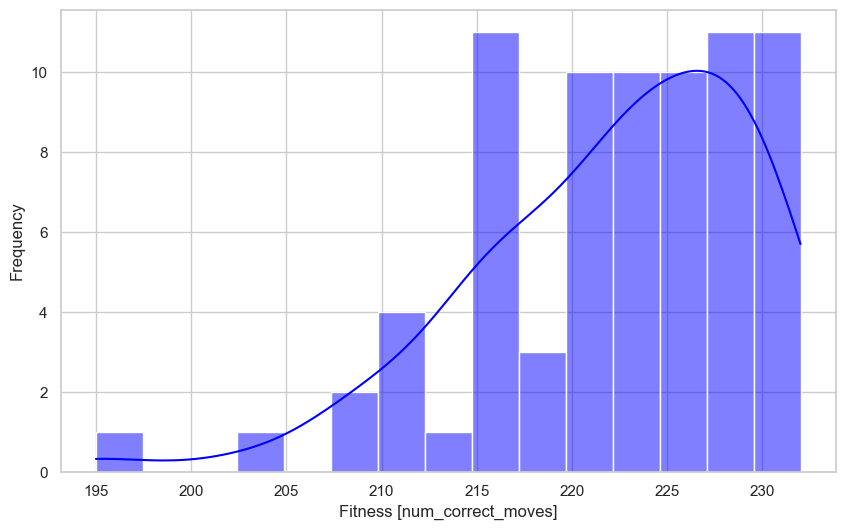

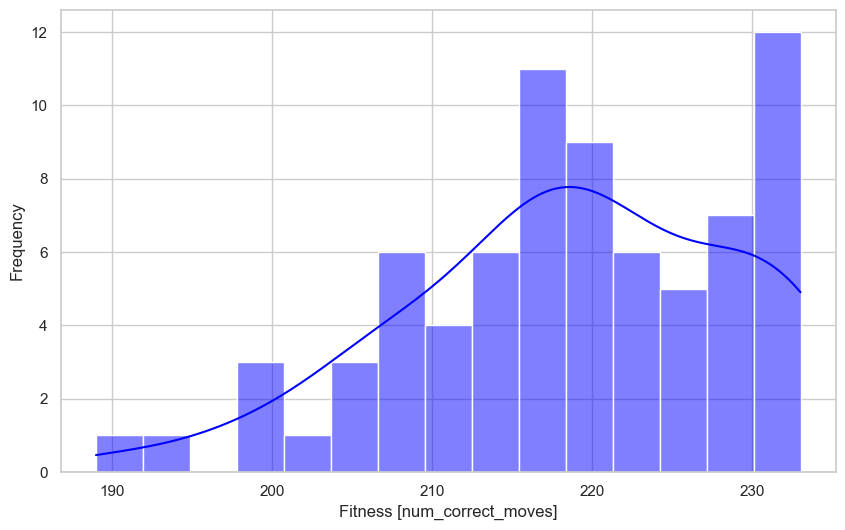

In [27]:
fitness_gen_0 = [169, 160, 184, 168, 166, 158, 158, 193, 186, 160, 167, 179, 178, 175, 154, 164, 166, 179, 176, 170, 181, 177, 155, 164, 193, 164, 174, 193, 183, 174, 174, 166, 172, 163, 162, 165, 176, 180, 168, 164, 177, 177, 175, 156, 174, 172, 178, 140, 165, 202, 178, 165, 185, 170, 177, 173, 173, 175, 199, 184, 169, 182, 177, 183, 152, 158, 171, 189, 188, 173, 174, 161, 184, 160, 164]
fitness_gen_49 = [226, 221, 221, 221, 221, 220, 220, 216, 206, 211, 213, 220, 198, 221, 202, 225, 212, 197, 219, 221, 216, 199, 200, 206, 206, 219, 213, 215, 212, 215, 219, 210, 210, 211, 210, 207, 214, 201, 211, 210, 210, 203, 212, 210, 198, 207, 194, 207, 202, 214, 213, 212, 204, 222, 216, 190, 220, 208, 209, 214, 220, 203, 206, 189, 209, 207, 210, 210, 213, 212, 216, 210, 213, 221, 214]
fitness_gen_99 =  [232, 232, 231, 231, 231, 230, 230, 222, 228, 229, 226, 215, 215, 229, 212, 226, 215, 217, 218, 224, 227, 215, 222, 208, 219, 210, 230, 223, 230, 227, 217, 229, 230, 224, 222, 223, 216, 228, 229, 224, 229, 214, 216, 229, 229, 216, 225, 215, 224, 210, 221, 229, 195, 225, 223, 221, 210, 224, 223, 226, 230, 220, 221, 208, 203, 224, 226, 217, 220, 226, 221, 228, 218, 226, 221]
fitness_gen_149 =  [233, 233, 233, 233, 233, 233, 233, 224, 219, 225, 226, 212, 209, 218, 224, 223, 194, 214, 214, 213, 225, 216, 225, 214, 205, 199, 216, 206, 218, 226, 218, 229, 207, 218, 216, 218, 220, 222, 216, 200, 231, 222, 228, 207, 223, 219, 219, 189, 220, 203, 207, 212, 230, 231, 211, 214, 220, 230, 208, 229, 233, 230, 210, 221, 232, 207, 229, 219, 218, 233, 217, 199, 220, 205, 214]

Optimal_Organism = '1111010011010010111111100001111101000110100011000100101100101100110100111011101100110101000100001000001111010100101010111111011000110000011110101010010101010001101011001100110011001010000101110011110101011100101000011000011011111110001110111001'
optimal_parameters = bit_to_params(Optimal_Organism)
print("Pawn Value: ", optimal_parameters.Piece_Value_Parameters.PAWN_VALUE)
print("Knight Value: ", optimal_parameters.Piece_Value_Parameters.KNIGHT_VALUE)
print("Bishop Value: ", optimal_parameters.Piece_Value_Parameters.BISHOP_VALUE)
print("Rook Value: ", optimal_parameters.Piece_Value_Parameters.ROOK_VALUE)
print("Queen Value: ", optimal_parameters.Piece_Value_Parameters.QUEEN_VALUE)
print("Bishop Mobility: ", optimal_parameters.Bishop_Parameters.BISHOP_MOBILITY)
print("Bishop Pair: ", optimal_parameters.Bishop_Parameters.BISHOP_PAIR)
print("Knight Mobility: ", optimal_parameters.Knight_Parameters.KNIGHT_SQ_MULT)
print("Knight Outposts: ", optimal_parameters.Knight_Parameters.KNIGHT_OUTPOST_MULT)
print("Queen Mobility: ", optimal_parameters.Queen_Parameters.QUEEN_MOBILITY)
print("King Number Friendly Pawn:", optimal_parameters.King_Parameters.KING_NUMBER_FRIENDLY_PAWN)
print("King Number Friendly Pawn Adjacent:", optimal_parameters.King_Parameters.KING_NUMBER_ENEMY_PAWN_ADJ)
print("KING_FRIENDLY_PAWN_ADVANCED1: ", optimal_parameters.King_Parameters.KING_FRIENDLY_PAWN_ADVANCED1)
print("KING_NUMBER_ENEMY_PAWN: ", optimal_parameters.King_Parameters.KING_NUMBER_ENEMY_PAWN)
print("KING_NUMBER_ENEMY_PAWN_ADJ: ", optimal_parameters.King_Parameters.KING_NUMBER_ENEMY_PAWN_ADJ)
print("KING_PRESSURE_MULT: ", optimal_parameters.King_Parameters.KING_PRESSURE_MULT)
print("PASSED_PAWN_MULT: ", optimal_parameters.Pawn_Parameters.PASSED_PAWN_MULT)
print("DOUBLED_PAWN_PENALTY: ", optimal_parameters.Pawn_Parameters.DOUBLED_PAWN_PENALTY)
print("ISOLATED_PAWN_PENALTY: ", optimal_parameters.Pawn_Parameters.ISOLATED_PAWN_PENALTY)
print("BACKWARD_PAWN_PENALTY: ", optimal_parameters.Pawn_Parameters.BACKWARD_PAWN_PENALTY)
print("PASSED_PAWN_ENEMY_KING_DIST: ", optimal_parameters.Pawn_Parameters.PASSED_PAWN_ENEMY_KING_DIST)
print("NUM_CENTER_PAWNS: ", optimal_parameters.Pawn_Parameters.NUM_CENTER_PAWNS)
print("ROOK_ATTACK_KING_FILE: ", optimal_parameters.Rook_Parameters.ROOK_ATTACK_KING_FILE)
print("ROOK_ATTACK_KING_ADJ_FILE: ", optimal_parameters.Rook_Parameters.ROOK_ATTACK_KING_ADJ_FILE)
print("ROOK_CONNECTED: ", optimal_parameters.Rook_Parameters.ROOK_CONNECTED)
print("ROOK_MOBILITY: ", optimal_parameters.Rook_Parameters.ROOK_MOBILITY)
print("ROOK_OPEN_FILE: ", optimal_parameters.Rook_Parameters.ROOK_OPEN_FILE)
print("ROOK_SEMI_OPEN_FILE: ", optimal_parameters.Rook_Parameters.ROOK_SEMI_OPEN_FILE)
print("ROOK_ATCK_WEAK_PAWN_OPEN_COLUMN: ", optimal_parameters.Rook_Parameters.ROOK_ATCK_WEAK_PAWN_OPEN_COLUMN)
print("ROOK_BEHIND_PASSED_PAWN: ", optimal_parameters.Rook_Parameters.ROOK_BEHIND_PASSED_PAWN)
print("PAWN_PIECE_TABLE: ", optimal_parameters.Piece_Table_Parameters.PAWN_PIECE_TABLE)
print("KNIGHT_PIECE_TABLE: ", optimal_parameters.Piece_Table_Parameters.KNIGHT_PIECE_TABLE)
print("BISHOP_PIECE_TABLE: ", optimal_parameters.Piece_Table_Parameters.BISHOP_PIECE_TABLE)
print("ROOK_PIECE_TABLE: ", optimal_parameters.Piece_Table_Parameters.ROOK_PIECE_TABLE)
print("QUEEN_PIECE_TABLE: ", optimal_parameters.Piece_Table_Parameters.QUEEN_PIECE_TABLE)
print("KING_PIECE_TABLE: ", optimal_parameters.Piece_Table_Parameters.KING_PIECE_TABLE)
print("CHECKMATE: ", optimal_parameters.Miscellanious_Parameters.CHECKMATE)


fitness_array_150_gen = [202, 202, 202, 202, 202, 205, 205, 209, 209, 210, 211, 211, 211, 214, 214, 214, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 
                         217, 217, 217, 217, 219, 219, 219, 219, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 226, 226, 226, 226, 227, 227, 227, 227, 227, 227, 
                         227, 227, 227, 227, 227, 227, 227, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 229, 229, 229, 229, 229, 229, 230, 230, 230, 230, 
                         230, 230, 230, 230, 230, 230, 231, 231, 231, 231, 231, 232, 232, 232, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 
                         233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 
                         233, 233, 233, 233, 233]

numbers_list = list(range(1, 151))

plt.figure()
plt.plot(numbers_list, fitness_array_150_gen, '.')
plt.xlabel('Generation number')
plt.ylabel('Fitness [num_correct_moves]')
plt.grid(True)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(fitness_gen_0, bins=15, kde=True, color='blue')
plt.xlabel('Fitness [num_correct_moves]')
plt.ylabel('Frequency')
#plt.title('Histogram of Fitness Generation 0')
plt.show()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(fitness_gen_49, bins=15, kde=True, color='blue')
plt.xlabel('Fitness [num_correct_moves]')
plt.ylabel('Frequency')
#plt.title('Histogram of Fitness Generation 49')
plt.show()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(fitness_gen_99, bins=15, kde=True, color='blue')
plt.xlabel('Fitness [num_correct_moves]')
plt.ylabel('Frequency')
#plt.title('Histogram of Fitness Generation 99')
plt.show()


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(fitness_gen_149, bins=15, kde=True, color='blue')
plt.xlabel('Fitness [num_correct_moves]')
plt.ylabel('Frequency')
#plt.title('Histogram of Fitness Generation 149')
plt.show()




# Candidate Master Organism

In [37]:

"""
# Testing the Optimal Organism on 1000 positions
# done
piece_values = Piece_Value_Parameters()
piece_value_parameters.PAWN_VALUE = 100 
piece_value_parameters.KNIGHT_VALUE = 300 #00100101100
piece_value_parameters.BISHOP_VALUE = 300 #00100101100
piece_value_parameters.ROOK_VALUE = 500 #00111110100
piece_value_parameters.QUEEN_VALUE = 900 #01110000100

handmade_bit_string = '00100101100001001011000011111010001110000100'

# done
bishop_parameters = Bishop_Parameters()
bishop_parameters.BISHOP_MOBILITY = 15 #001111
bishop_parameters.BISHOP_PAIR = 63 #111111

handmade_bit_string = '001111111111'

# done
knight_parameters = Knight_Parameters()
knight_parameters.KNIGHT_SQ_MULT = 13 #001101
knight_parameters.KNIGHT_OUTPOST_MULT = 63 #111111

handmade_bit_string = '001101111111'

# done
queen_parameters = Queen_Parameters()
queen_parameters.QUEEN_MOBILITY = 2 #000010

handmade_bit_string = '000010'

# done
king_parameters = King_Parameters()
king_parameters.KING_NUMBER_FRIENDLY_PAWN = 63 #111111
king_parameters.KING_NUMBER_FRIENDLY_PAWN_ADJ = 63 #111111
king_parameters.KING_FRIENDLY_PAWN_ADVANCED1 = 50 #110010
king_parameters.KING_NUMBER_ENEMY_PAWN = 30 #011110
king_parameters.KING_NUMBER_ENEMY_PAWN_ADJ = 30 #011110
king_parameters.KING_PRESSURE_MULT = 0 #000000

handmade_bit_string = '111111111111110010011110011110000000'

# done
pawn_parameters = Pawn_Parameters()
pawn_parameters.PASSED_PAWN_MULT = 63 #111111
pawn_parameters.DOUBLED_PAWN_PENALTY = 40 #101000
pawn_parameters.ISOLATED_PAWN_PENALTY = 30 #011110
pawn_parameters.BACKWARD_PAWN_PENALTY = 50 #110010
pawn_parameters.PASSED_PAWN_ENEMY_KING_DIST = 0 #000000
pawn_parameters.NUM_CENTER_PAWNS = 20 #010100

handmade_bit_string = '111111101000011110110010000000010100'

# done
rook_parameters = Rook_Parameters()
rook_parameters.ROOK_ATTACK_KING_FILE = 0 #000000
rook_parameters.ROOK_ATTACK_KING_ADJ_FILE = 0 #000000
rook_parameters.ROOK_CONNECTED = 20 #010100
rook_parameters.ROOK_MOBILITY = 7 #000111
rook_parameters.ROOK_OPEN_FILE = 63 #111111
rook_parameters.ROOK_SEMI_OPEN_FILE = 30 #011110
rook_parameters.ROOK_ATCK_WEAK_PAWN_OPEN_COLUMN = 0 #000000
rook_parameters.ROOK_BEHIND_PASSED_PAWN =  0 #000000

handmade_bit_string = '000000000000010100000111111111011110000000000000'

# done
piece_table_parameters = Piece_Table_Parameters()
piece_table_parameters.BISHOP_PIECE_TABLE = 1 #000001
piece_table_parameters.KNIGHT_PIECE_TABLE = 1 #000001
piece_table_parameters.ROOK_PIECE_TABLE = 1 #000001
piece_table_parameters.QUEEN_PIECE_TABLE = 1 #000001
piece_table_parameters.PAWN_PIECE_TABLE = 1 #000001
piece_table_parameters.KING_PIECE_TABLE = 1 #000001

handmade_bit_string = '000001000001000001000001000001000001'
00111110100000
"""

handmade_bit_string = ['0010010110000100101100001111101000111000010000111111111100110111111100001011111111111111001001111001111000000011111110100001111011001000000001010000000000000001010000011111111101111000000000000000000100000100000100000100000100000100111110100000']
print(len(handmade_bit_string[0]))

244


In [38]:
handmade_fitness = calculate_fitness(handmade_bit_string)
#print(handmade_fitness)

Organism number  0
Fittest Organism:  200
Fitness Array:  [200]
